<a href="https://colab.research.google.com/github/ArnavKetkar/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

##Data Preparing and Loading

###Creating data using linear regression

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

###Splitting data into training and testing sets

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_test)

(40, 10)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  '''
  Plots training data, test data and compares predictions.
  '''
  plt.figure(figsize=(10, 7))

  #Plot train data in Blue
  plt.scatter(train_data, train_labels, c='blue', s=4, label='Training Data')

  #Plot test data in black
  plt.scatter(test_data, test_labels, c='black', s=4, label='Testing Data')

  if predictions is not None:
    #Plot predictions in red
    plt.scatter(test_data, predictions, c='red', s=4, label='Predictions')

  plt.legend(prop={'size':14})

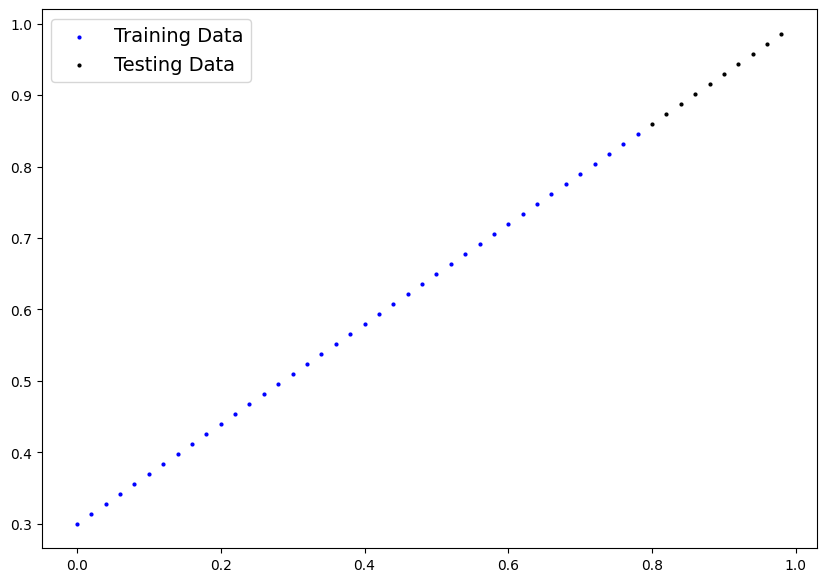

In [5]:
plot_predictions()

##Building Model

In [6]:
from torch import nn

#Create linear regression model class
class LinearRegressionModel(nn.Module): #almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #Forward method to define computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #always use when inheriting nn.Module
    return self.weights * x + self.bias


In [7]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making Inference using torch.inference_mode()

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

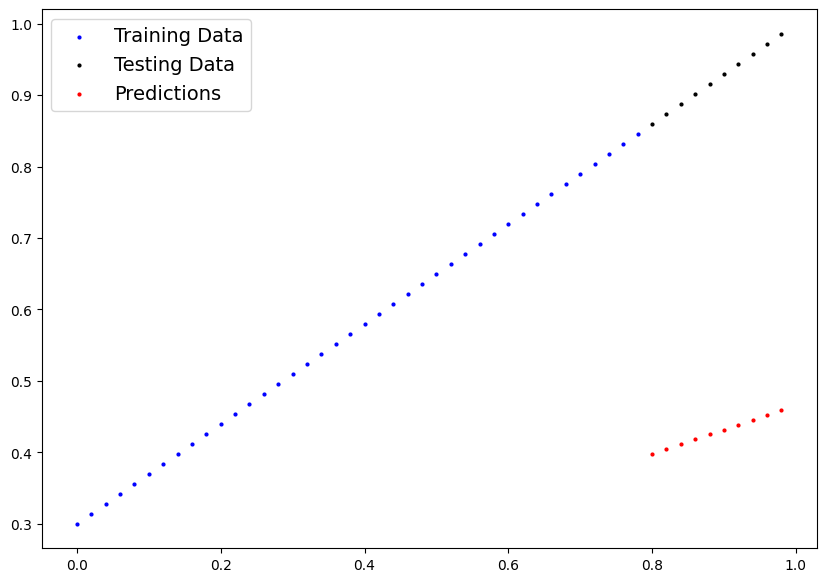

In [10]:
plot_predictions(predictions=y_preds)

In [11]:
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


###Building a Training Loop (and testing loop)
0. Loop through data and do...
1. Forward Pass (to make predictions)
2. Calculate Loss (compare predictions to ground truth labels)
3. Optimizer zero grad
4. Backward Pass (calculate gradient of loss function wrt each of the parameters of model)
5. Optimizer step

In [12]:
#epoch is one loop thru data
epochs = 200
epoch_count =  []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  #Set model to training mode
  model_0.train() # sets all params that require gradients to require gradints

  # 1. Forward Pass (to make predictions)
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss= loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Back Propogation on loss
  loss.backward()

  #5. Opimzizer step
  optimizer.step()

  model_0.eval() # turns off gradient tracking. Also turns off things like dropout, batch norm, etc. not needed for testing
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

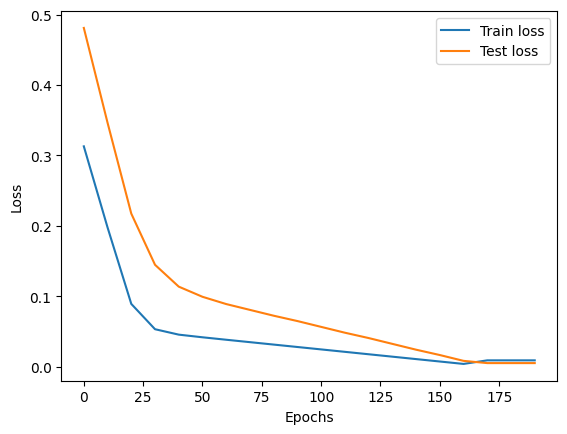

In [20]:
#plot loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values)), label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [14]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

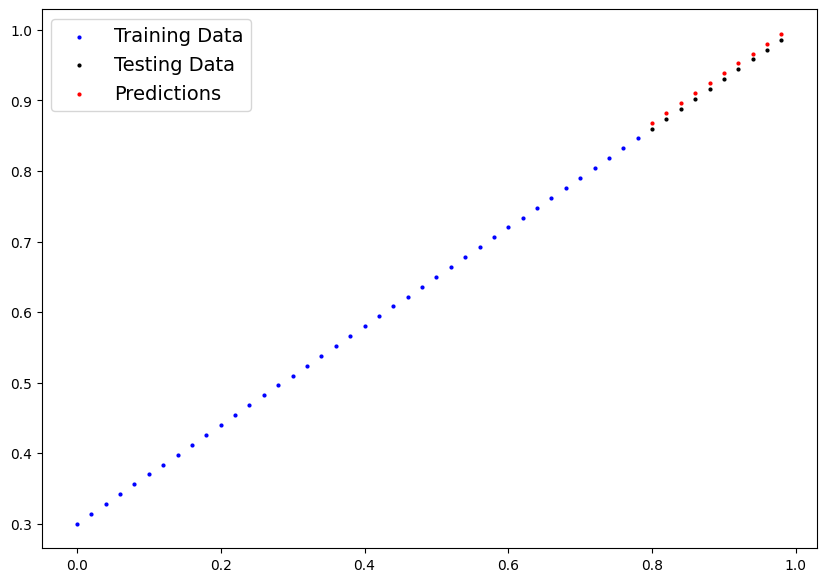

In [15]:
plot_predictions(predictions=y_preds_new)

##Saving model

In [22]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save model state_dict
print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Oct  5 20:39 01_pytorch_workflow_model_0.pth


##Loading model

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# To load a saved state dict, instantiate a new instance of model class
loaded_model_0 = LinearRegressionModel()
#loaded_model_0.state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])